<a href="https://colab.research.google.com/github/pauhidalgoo/TDR-MusicNN/blob/main/TDR_RNN_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TDR-RNN-12**


---



*Tercera versió amb dotze notes*

Pau Hidalgo Pujol

Aquest és un codi fruit del meu [TDR](https://drive.google.com/file/d/1ZhvwYO2UMx40ZbBRD95WKq1T5hDV4oAG/view?usp=sharing), que se centra en la creació d'una xarxa neuronal per a la composició de música, que és el programa que es troba a continuació. Aquesta és una de les 5 versions creades. Els resultats es poden veure a la següent [carpeta](https://drive.google.com/drive/folders/1lazCLpoVOKRsLouBm1vRHbuPPvLK3yXL?usp=sharing).

Per executar els  codis, cal clicar el botó que tenen a l'esquerra entre [ ]. 

In [ ]:
#@title Inicialització
#@markdown Aquest codi instal·la la llibreria MIDO. La resta de llibreries que utilitzarem ja venen per defecte en el Colab.
!pip install mido

     |████████████████████████████████| 51 kB 2.7 MB/s 


In [ ]:
#@title Accedeix als arxius de Drive
#@markdown Munta els arxius de Drive de forma que puguin ser accedits pel codi. Et demana un codi d'autorització, que obtens clicant al link i iniciant sessió amb el teu compte de Google.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


En el següents enllaços ([enllaç 1](https://drive.google.com/drive/folders/1IlUM-jFv26QOl7ZjsoB-ShZEu7a576H8?usp=sharing), [enllaç 2](https://drive.google.com/drive/folders/19OQ_CvwHfhBYbkxCCwhW6VuM2SMabQPL?usp=sharing)) hi han les carpetes que contenen els fitxers d'entrenament. Addicionalment, també hi ha la [carpeta 3](https://drive.google.com/drive/folders/1BADFQoKME8XMoBseY1Zt6i4D32pCmsb4?usp=sharing) que conté MIDI de grups i compositors famosos. Per poder executar el codi correctament, s'ha de buscar el seu directori dins del drive (a la icona de la carpeta de la esquerra es veuen tots els fitxers i si fas click dret sobre un dells ja t'apareix la opció de copiar el directori) i copiar-lo en la variable *cancogeneral* del codi. 

## Coses a tenir en compte a la hora d'executar el codi:
- El learning rate d'aquesta versió ha d'estar entre 0.1 i 0.00000001. L'ideal acostuma a ser 0.001.
- No es recomana agafar menys de 100 notes d'entrada, ja que a vegades pot donar error.
- Recordar canviar el directori si està en un altre lloc del vostre Drive
- No posar un nombre excessiu de notes, neurones i repeticions, ja que tardarà molta estona a completar-se.
- Si surt un error que diu alguna cosa similar a : Is a directory: Songs/Training/.ipynb_chekcpoints, executar que posa *Elimina possible error*.
- Si el fitxer no s'ha baixat bé, executar el penúltim codi


Nombre de notes: 500
Nombre de neurones: 300
Learning rate: 0.001
Nombre de repeticions: 10000


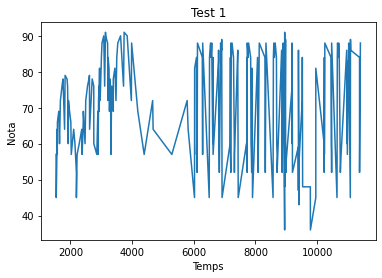

237
Current set of weights, iteration: 0 loss: 3299.9858553579556 acc: 0.0
Current set of weights, iteration: 50 loss: 3193.6552542387617 acc: 0.03017241379310345
Current set of weights, iteration: 100 loss: 3112.6711660588207 acc: 0.0
Current set of weights, iteration: 150 loss: 3029.7062699924413 acc: 0.0
Current set of weights, iteration: 200 loss: 3017.18101658672 acc: 0.021551724137931036
Current set of weights, iteration: 250 loss: 2972.983668756199 acc: 0.0
Current set of weights, iteration: 300 loss: 2959.9746478330526 acc: 0.01293103448275862
Current set of weights, iteration: 350 loss: 2934.603102197667 acc: 0.03017241379310345
Current set of weights, iteration: 400 loss: 2925.6873446962986 acc: 0.034482758620689655
Current set of weights, iteration: 450 loss: 2902.9873214356294 acc: 0.034482758620689655
Current set of weights, iteration: 500 loss: 2915.792508520337 acc: 0.021551724137931036
Current set of weights, iteration: 550 loss: 2899.704581889574 acc: 0.030172413793103

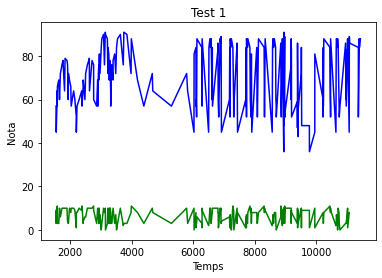

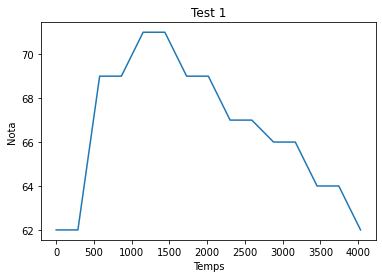

15
[-0.02362205 -0.02362205  0.08661417  0.08661417  0.11811024]
[[0], [96], ['latin1'], [62, 62, 69, 69, 71, 70, 70, 63, 63, 63, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]]


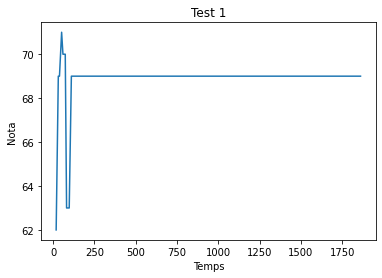

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
# @title Codi { form-width: "50px" }
# @markdown Aquest és el codi del treball en si. Al executar-lo et demanarà una sèrie de paràmetres, com el número de notes d'entrada o el número de neurones. A la part inferior es pot anar observant la sortida de pantalla, que ens mostra dades sobre l'entrenament de la xarxa. Per veure el codi, cal simplent clicar on posa Show Code.

from google.colab import files
from random import random
import random
from random import seed
import numpy
import mido
import math
import os
import matplotlib.pyplot as plt
from mido import Message, MidiFile, MidiTrack, MAX_PITCHWHEEL, MetaMessage, UnknownMetaMessage

# cancogeneral = (input('Directori de la cançó: '))
cancogeneral = "/content/drive/MyDrive/TDR/Songs/Songs/Training3/Dvorak"
# inputsgeneral = int(input('Nombre d'inputs: '))
inputsgeneral = 5
notesgeneral = int(input('Nombre de notes: '))
neuronesgeneral = int(input('Nombre de neurones: '))
learningrategeneral = float(input('Learning rate: '))
repsgeneral = int(input('Nombre de repeticions: '))
# sortidageneral = int(input('Nombre de notes de sortida: '))
sortidageneral = 180


# -------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------

def arraytomidi(fitxer, directori): # funció encarregada de passar els arrays a fitxers MIDI
    notes = fitxer
    outfile = MidiFile()
    track = MidiTrack()
    lll = 0
    outfile.tracks.append(track)
    wa = 0
    ar = notes[0]
    outfile.type = int(ar[0])
    ar = notes[1]
    outfile.ticks_per_beat = int(ar[0])
    ar = notes[2]
    outfile.charset = (ar[0])
    ar = notes[3]
    notes = notes[3]
    ritmes = [240, 240, 240, 240, 240, 480, 480, 960, 1920, 240, 480, 480, 480, 960] #llista de ritmes, s'utilitza més endavant
    for i in range(len(notes) - 1): #itera per tots els elements de l'array
        i = i + 1
        ar = []
        ar.append(notes[i])
        track.append(Message('program_change', channel=0, program=1, time=0))
        track.append(MetaMessage(type="set_tempo", tempo=100000, time=0)) #inicialitza el tempo de la cançó (velocitat)
        if (ar != []):
            if (isinstance(ar[0], int) == True): #comprova que el primer element sigui un número. Si ho és, significa que és una nota
                if (ar[0] == 1 and len(ar) == 4):
                    track.append(Message('note_on', note=ar[2], velocity=ar[3], time=ar[4]))
                elif (ar[0] == 0 and len(ar) == 4):
                    track.append(Message('note_off', note=ar[2], velocity=ar[3], time=ar[4]))
                elif (ar[0] == 1 and len(ar) == 5):
                    track.append(Message('note_on', channel=ar[1], note=ar[2], velocity=ar[3], time=ar[4]))
                    lll = lll + 1
                elif (ar[0] == 0 and len(ar) == 5):
                    track.append(Message('note_off', channel=ar[1], note=ar[2], velocity=ar[3], time=ar[4]))
                    lll = lll + 1
                elif (len(ar) == 3 and ar[0] == 0):
                    track.append(Message('note_off', channel=0, note=ar[1], velocity=64, time=ar[2]))
                elif (len(ar) == 3 and ar[0] == 1):
                    track.append(Message('note_on', channel=0, note=ar[1], velocity=64, time=ar[2]))
                elif (len(ar) == 1):
                    track.append(Message('note_on', channel=0, note=int(ar[0]), velocity=(random.randint(20, 50)),
                                         time=random.randint(1, 20)))
                    track.append(Message('note_off', channel=0, note=int(ar[0]), velocity=(random.randint(20, 40)),
                                         time=ritmes[random.randint(0, 1)])) #si la nota no té cap ritme assignat, li assigna un element aleatori de la llista
            elif (len(ar) != 1): #mira els altres tipus d'elements
                e = ar[0]
                if (ar[2] == 'end_of_track'):
                    l2 = ar[3].split("=")
                    e2 = l2[1].replace('>', '')
                    track.append(MetaMessage(type='end_of_track', time=int(e2)))
                    if (i + 1 < len(notes)):
                        ar2 = notes[i + 1]
                        ee = ar2[0]
                        if (ee[2] != 'track_name'):
                            if (outfile.type != 0):
                                track = MidiTrack()
                                track.append(MetaMessage(type='track_name', name=("track" + str(wa)), time=int(e2)))
                                outfile.tracks.append(track)
                            else:
                                track.append(MetaMessage(type='track_name', name=("track" + str(wa)), time=int(e2)))
                            wa = wa + 1


                elif (ar[2] == 'track_name'):
                    l2 = ar[3].split("=")
                    l3 = ar[(len(ar) - 1)].split("=")
                    e2 = l3[1].replace('>', '')
                    if (outfile.type != 0):
                        track = MidiTrack()
                        a = str(l2[1])
                        track.append(MetaMessage(type='track_name', name=a, time=int(e2)))
                        outfile.tracks.append(track)
                    else:
                        a = str(l2[1])
                        track.append(MetaMessage(type='track_name', name=a, time=int(e2)))
                elif (ar[2] == 'time_signature'):
                    l2 = ar[3].split("=")
                    l3 = ar[4].split("=")
                    l4 = ar[5].split("=")
                    l5 = ar[6].split("=")
                    l6 = ar[7].split("=")
                    e2 = l6[1].replace('>', '')
                    track.append(MetaMessage(type="time_signature", numerator=int(l2[1]), denominator=int(l3[1]),
                                             clocks_per_click=int(l4[1]), notated_32nd_notes_per_beat=int(l5[1]),
                                             time=int(e2)))
                elif (ar[2] == 'key_signature'):
                    l2 = ar[3].split("=")
                    e1 = l2[1]
                    l3 = ar[4].split("=")
                    e2 = l3[1].replace('>', '')
                    track.append(MetaMessage(type="key_signature", key=e1[1], time=int(e2)))
                elif (ar[2] == 'set_tempo'):
                    l2 = ar[3].split("=")
                    l3 = ar[4].split("=")
                    e2 = l3[1].replace('>', '')
                    track.append(MetaMessage(type="set_tempo", tempo=int(l2[1]), time=int(e2)))
                elif (ar[2] == 'instrument_name'):
                    l2 = ar[3].split("=")
                    l3 = ar[len(e) - 1].split("=")
                    e2 = l3[1].replace('>', '')
                    track.append(MetaMessage(type="instrument_name", name=l2[1], time=int(e2)))
                elif (e == 'program_change'):
                    l2 = ar[1].split("=")
                    l3 = ar[2].split("=")
                    l4 = ar[3].split("=")
                    e2 = l4[1].replace('>', '')
                    track.append(Message('program_change', channel=int(l2[1]), program=int(l3[1]), time=int(l4[1])))
                elif (e == 'control_change'):
                    l2 = ar[1].split("=")
                    l3 = ar[2].split("=")
                    l4 = ar[3].split("=")
                    l5 = ar[4].split("=")
                    track.append(Message('control_change', channel=int(l2[1]), control=int(l3[1]), value=int(l4[1]),
                                         time=int(l5[1])))
                elif (e == 'sysex'):
                    l2 = ar[1].split("=")
                    l3 = ar[2].split("=")
                    e2 = l3[1].replace('>', '')
                    e3 = l2[1].split(',')
                    e4 = []
                    for w in e3:
                        o = w.replace('(', '')
                        o = o.replace(')', '')
                        e4.append(int(o))
                    track.append(Message(type='sysex', data=e4, time=int(e2)))

                elif (ar[2] == 'midi_port'):
                    l2 = ar[3].split("=")
                    l3 = ar[4].split("=")
                    e2 = l3[1].replace('>', '')
                    track.append(MetaMessage(type='midi_port', port=int(l2[1]), time=int(e2)))
                elif (ar[2] == 'lyrics'):
                    l2 = ar[3].split("=")
                    l3 = ar[len(ar) - 1].split("=")
                    e2 = l3[1].replace('>', '')
                    track.append(MetaMessage(type="lyrics", text=l2[1], time=int(e2)))
                elif (ar[0] == 'control_change'):
                    l2 = ar[1].split("=")
                    l3 = ar[2].split("=")
                    l4 = ar[3].split("=")
                    l5 = ar[4].split("=")
                    track.append(Message(type='sysex', channel=int(l2), control=int(l3), value=int(l4), time=int(l5)))
                elif (ar[2] == 'smpte_offset'):
                    l2 = ar[3].split("=")
                    l3 = ar[4].split("=")
                    l4 = ar[5].split("=")
                    l5 = ar[6].split("=")
                    l6 = ar[7].split("=")
                    l7 = ar[8].split("=")
                    l8 = ar[9].split("=")
                    e2 = l8[1].replace('>', '')
                    track.append((MetaMessage(type='smpte_offset', frame_rate=int(l2[1]), hours=int(l3[1]),
                                              minutes=int(l4[1]), seconds=int(l5[1]), frames=int(l6[1]),
                                              sub_frames=int(l7[1]), time=int(e2))))
                else:
                    res = "res"
                    # print("CIGUEÑA")
                    # print(ar)

    outfile.save(directori)


def miditoarray(midi): #funció que transforma els fitxers MIDI en arrays
    if __name__ == '__main__':
        w = 0
        mat = []
        arr = []
        midi_file = MidiFile(midi)
        arr.append(midi_file.type)
        mat.append(arr)
        arr = []
        arr.append(midi_file.ticks_per_beat)
        mat.append(arr)
        arr = []

        arr.append(midi_file.charset)
        mat.append(arr)
        arr = []
        # print(midi_file.ticks_per_beat)
        # print(midi_file.type)
        i = 0
        for i, track in enumerate(midi_file.tracks): #itera per tots els tracks del fitxer
            if (i == 2):
                break
            i = i + 1
            # print("tratratra")

            for message in track: #itera per tots els missatges del fitxer

                e = (format(message).split())
                if (e[0] == 'program_change'):
                    arr.append(e)
                elif (e[0] == '<meta'):
                    arr.append(e)

                elif (e[0] == 'pitchwheel'):
                    l1 = (e[1].split('='))
                    l2 = (e[2].split('='))
                    l3 = (e[3].split('='))
                    arr.append(int(l1[1]))
                    arr.append(int(l2[1]))
                    arr.append(int(l3[1]))
                elif (e[0] == 'note_on' or e[0] == 'note_off'):

                    if (e[0] == "note_on"):
                        arr.append(1)
                    else:
                        arr.append(0)
                    l1 = (e[1].split('='))
                    l2 = (e[2].split('='))
                    l3 = (e[3].split('='))
                    l4 = (e[4].split('='))
                    arr.append(int(l1[1]))
                    arr.append(int(l2[1]))
                    arr.append(int(l3[1]))
                    arr.append(int(l4[1]))
                elif (e[0] == 'control_change'):
                    arr.append(e)
                elif (e[0] == 'sysex'):
                    arr.append(e)
                else:
                    res = "res"
                    # arr.append("ajuda")
                    # print(e)

                mat.append(arr)

                arr = []

                w = w + 1
    else:
        res = "res"
        # print("aveurequepasa")
    return mat #retorna una matriu (array) amb tots els elements del fitxer


def graficador(s): #funció encarregada de transformar un array en una gràfica
    nota = []
    temps = []
    melo = []
    oo = []
    onota = []
    otemps = []
    matriu = []
    meta = []
    i = 0
    e = 0
    oe = 0
    for c in s: #itera per tots els elements de l'array
        if (len(c) != 0 and len(c) != 1 and len(c) == 5):
            oo.append(c[0])
            if (c[0] == 1):
                nota.append(c[2]) #afegeix la nota a la llista de notes
                if (temps != []):
                    temps.append(c[4] + temps[e]) #afegeix el temps de la nota a la llista de temps
                    e = e + 1
                else:
                    temps.append(c[4] + 0)
            elif (c[0] == 0):
                onota.append(c[2])
                if (otemps != []):
                    otemps.append(c[4] + otemps[oe])
                    oe = oe + 1
                else:
                    otemps.append(c[4] + 0)

        elif (len(c) != 0 and isinstance(c[0], int) == False and c[0] != "latin1"):
            oo.append(2)
            a = c[0]
            meta.append(a)

    plt.plot(temps, nota) #crea el gràfic
    plt.title('Test 1')
    plt.xlabel('Temps')
    plt.ylabel('Nota')
    plt.show() #mostra el gràfic
    plt.savefig('V3-generacio.png') 
    return (nota)


def grafcomparacio(s1, s2): #funció que fa dos gràfics en una mateixa imatge
    nota1 = []
    temps1 = []
    melo1 = []
    nota2 = []
    temps2 = []
    melo2 = []
    oo = []
    onota = []
    otemps = []
    matriu = []
    meta = []
    i = 0
    e = 0
    oe = 0
    for c in s1: #idèntic al funcionament de la funció graficador
        if (len(c) != 0 and len(c) != 1 and len(c) == 5):
            oo.append(c[0])
            if (c[0] == 1):
                nota1.append(c[2])
                if (temps1 != []):
                    temps1.append(c[4] + temps1[e])
                    e = e + 1
                else:
                    temps1.append(c[4] + 0)

            elif (c[0] == 1 and c[4] != 0):
                w = 0
                while (w < c[4]):
                    melo1.append(c[2])
                    w = w + 1
            elif (c[0] == 0):
                onota.append(c[2])
                if (otemps != []):
                    otemps.append(c[4] + otemps[oe])
                    oe = oe + 1
                else:
                    otemps.append(c[4] + 0)

        elif (len(c) != 0 and isinstance(c[0], int) == False and c[0] != "latin1"):
            oo.append(2)
            a = c[0]
            meta.append(a)
    i = 0
    e = 0
    oe = 0
    for c in s2: #idèntic a l'anterior però amb unes variables diferents
        if (len(c) != 0 and len(c) != 1 and len(c) == 5):
            oo.append(c[0])
            if (c[0] == 1):
                nota2.append(c[2])
                if (temps2 != []):
                    temps2.append(c[4] + temps2[e])
                    e = e + 1
                else:
                    temps2.append(c[4] + 0)

            elif (c[0] == 1 and c[4] != 0):
                w = 0
                while (w < c[4]):
                    melo2.append(c[2])
                    w = w + 1
            elif (c[0] == 0):
                onota.append(c[2])
                if (otemps != []):
                    otemps.append(c[4] + otemps[oe])
                    oe = oe + 1
                else:
                    otemps.append(c[4] + 0)

        elif (len(c) != 0 and isinstance(c[0], int) == False and c[0] != "latin1"):
            oo.append(2)
            a = c[0]
            meta.append(a)

    plt.plot(temps1, nota1, 'b', label="Original") #crea la gràfica del primer array  
    plt.plot(temps1[:len(nota2)], nota2, 'g', label="Predicció") #crea la gràfica del segon array
    plt.title('Test 1')
    plt.xlabel('Temps')
    plt.ylabel('Nota')
    plt.show() #mostra les dues gràfiques en la mateixa imatage
    plt.savefig('V3-entrenament.png')


def dades(array): #organitza les dades per poder ser passades per la xarxa
    print(len(array))
    i = 0
    matriu = []
    pred = []
    while (i < (len(array) - inputsgeneral)): #itera per tots els elements de l'array
        nou = []
        l = 0
        while (l < inputsgeneral): #afegeix notes en un array fins que tingui la mida que li hem dit amb la variable inputsgeneral
            o = array[l + i]%12
            nou.append(array[l + i]) 
            l = l + 1
        matriu.append(nou) #afegeix aquest array a la variable que acabarà sent la X
        pred.append(array[i + inputsgeneral]%12) #afegeix els valors que seràn de la variable Y
        i = i + 1
    return matriu, pred

class ReLu: #funció d'activació
    def forward(self, inputs):
        self.output = numpy.maximum(0, inputs)
    def backward(self, x):
        x[x <= 0] = 0
        x[x > 0] = 1
        self.output = x

#funcions d'activació no utilitzades (no acaben d'anar)
class LReLu: 
    def forward(self, x):
        x[x<=0] = 0.1*x
        self.output = x
    def backward(self, x):
        x[x <= 0] = 0.1
        x[x > 0] = 1
        self.output = x

class ELU:
    def forward(self, x):
        l[l <=0 ] = 1 * (numpy.exp(l) - 1)
        self.output = x
    def backward(self, x):
        x[x > 0] = 1
        x[x <= 0] = 1 * numpy.exp(x)
        self.output = x

class Sig:
    def forward(self, inputs):
        self.output = 1.0 / (1.0 + numpy.exp(-inputs))
    def backward(self, x):
        self.output = sigmoid(x) * (1 - sigmoid(x))


def sigmoid(x):
    return 1 / (1 + numpy.exp(-x))


def softmax(inputs): #funció d'activació de la última capa
  exp_values = numpy.exp(inputs - numpy.max(inputs, axis=1,keepdims=True))
  probabilities = exp_values / numpy.sum(exp_values, axis=1,keepdims=True)
  return probabilities

  
class ReLu: 
    def forward(self, inputs):
        self.output = numpy.maximum(0, inputs)
    def backward(self, x):
        x[x <= 0] = 0
        x[x > 0] = 1
        self.output = x
class RNN: #classe que crea la xarxa
    def __init__(self, n_neurons): #inicialitza la xarxa
        self.weights_U =  numpy.random.randn(1, n_neurons)
        self.weights_W = numpy.random.randn(n_neurons, n_neurons)
        self.weights_V = numpy.random.randn( n_neurons, 12)
        self.bh = 0.1 * numpy.random.randn(1, neuronesgeneral)
        self.by = 0.1 * numpy.random.randn(1, 12)
    def forward(self, inputs, h): #passa els elements per la xarxa 
        l = []
        ih = numpy.dot(inputs, self.weights_U) #multiplica els inputs pels pesos U
        hh = numpy.dot(h, self.weights_W) #multiplica la h pels pesos W
        l = ih + hh
        act = numpy.tanh(l + self.bh) #funció d'activació (en aquest cas, és tanh)
        h = act
        return h

# -------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------
ar = []
lo = []
for l in os.listdir(cancogeneral): #itera per tots els MIDI de la carpeta
    l = cancogeneral + "/" + l
    arr = miditoarray(l)
    ar = ar + arr

lowest_loss = 999999999
X, y = dades(graficador(ar[:notesgeneral]))
X = numpy.array(X[:notesgeneral])
y = numpy.array(y[:notesgeneral])
one_hot_y = numpy.zeros((len(y), 12))
one_hot_x = numpy.zeros((len(X), inputsgeneral, 12))
u = 0
for e in y:
    one_hot_y[u, e - 1] = 1 #crea una variable Y one-hot-encoded
    u = u + 1

X = (X-63.5)/63.5 #fa que les dades siguin més pròximes a 0 perquè la xarxa treballa millor amb aquestes
xarxa = RNN(neuronesgeneral)
for epoch in range(repsgeneral): #realitza tantes repeticions com li siguin indicades per la variable repsgeneral
    xarxa.weights_W += learningrategeneral * numpy.random.randn(neuronesgeneral, neuronesgeneral) #actualitza els pesos aleatòriament
    xarxa.weights_U += learningrategeneral * numpy.random.randn(1, neuronesgeneral)
    xarxa.weights_V += learningrategeneral * numpy.random.randn(neuronesgeneral, 12)
    xarxa.bh += 0.1 * learningrategeneral * numpy.random.randn(1, neuronesgeneral)
    xarxa.by += 0.1 * learningrategeneral * numpy.random.randn(1, 12)
    i = 0
    loss = 0
    num_correct = 0
    h = numpy.zeros((1, xarxa.weights_W.shape[0]))
    m = 0
    for e in X[0]: #passa les dades per la xarxa tants cops com inputsgeneral
      w = numpy.array(X[:,m]) #passa tots els elemens situats en una posició determinada (primer tots els primers, en la següent repeticó els segons...)
      w = w[:, None]
      h = xarxa.forward(w, h) #assigna a la variable h el valor de sortida
      m = m + 1
      w = []
    out = numpy.dot(h, xarxa.weights_V) + xarxa.by #multiplica la sortida pels pesos V i hi suma el bias
    probs = softmax(out) #activació de la última capa
    y_pred_clipped = numpy.clip(probs, 1e-7, 1 - 1e-7) #evita el log0
    loss = numpy.sum(-one_hot_y * numpy.log(y_pred_clipped)) #calcula el loss
    loss = numpy.mean(loss)
    predictions = numpy.argmax(probs, axis=1) #mira les prediccions que ha fet la xarxa
    accuracy = numpy.mean(predictions == y) #calcula l'encert
    if loss < lowest_loss: #si el loss és més petit que el loss més petit registrat, guarda els pesos
        accuracy = num_correct / len(X)
        best_wW = xarxa.weights_W.copy()
        best_wU = xarxa.weights_U.copy()
        best_wV = xarxa.weights_V.copy()
        best_bh = xarxa.bh.copy()
        best_by = xarxa.by.copy()
        lowest_loss = loss

    else:
        xarxa.weights_W = best_wW.copy()
        xarxa.weights_U = best_wU.copy()
        xarxa.weights_V = best_wV.copy()
        xarxa.bh = best_bh.copy()
        xarxa.by = best_by.copy()
    if (epoch%50 == 0): #mostra per pantalla el progrés de la xarxa
          print('Current set of weights, iteration:', epoch, 'loss:', loss, 'acc:', accuracy)
print('Lowest loss:', lowest_loss)
array = [[0], [96], ['latin1']]
eee = numpy.argmax(probs, axis=1).tolist()
array.append(eee)
arraytomidi(array, "/content/drive/MyDrive/TDR/Songs/Songs/entrenornndotze.mid")
e = miditoarray("/content/drive/MyDrive/TDR/Songs/Songs/entrenornndotze.mid")
grafcomparacio(ar[inputsgeneral:notesgeneral+inputsgeneral], e) #compara les prediccions amb les dades esperades

ar = miditoarray('/content/drive/MyDrive/TDR/Songs/Songs/inici.mid') #transforma l'inici a array
X, y = dades(graficador(ar[:notesgeneral+1]))
X = numpy.array(X[:notesgeneral])
y = numpy.array(y[:notesgeneral])

k = 0
kl = []
X = (X-63.5)/63.5
if (len(X)>1):
  X = X[0]
array2 = [[0], [96], ['latin1']]
for c in X:
    c = (c*63.5)+63.5
    kl.append(int(c))
print(X)
while (k < sortidageneral): #realitza repeticions mentres la llargada del fitxer de sortida sigui més petita que la variable sortidageneral
    h = numpy.zeros((1, xarxa.weights_W.shape[0]))
    m = 0
    for e in X: #passa tots els elements de X
      w = numpy.array(e)
      h = xarxa.forward(w, h)
      m = m + 1
      w = []
    out = numpy.dot(h, xarxa.weights_V) + xarxa.by
    probs = softmax(out) #prediu el següent element
    eee2 = numpy.argmax(probs, axis=1).tolist()
    eee2 = eee2[0]
    kl.append(eee2+60) #guarda l'element que ha predit al que acabarà sent la cançó final
    X = X.tolist()
    X.append((eee2-63.5)/63.5) #guarda l'element que ha predit a X
    X.pop(0) #elimina el primer element de X
    X = numpy.array(X)
    k = k + 1
for i in kl:
    i = (i*63.5)+63.5
    i = int(i)
array2.append(kl)

print(array2)
arraytomidi(array2[:sortidageneral], "/content/drive/MyDrive/TDR/Songs/Songs/provarnndotze.mid") #transforma la sortida a MIDI
graficador(miditoarray("/content/drive/MyDrive/TDR/Songs/Songs/provarnndotze.mid"))
files.download("/content/drive/MyDrive/TDR/Songs/Songs/provarnndotze.mid")

In [ ]:
#@title Exporta la cançó generada
from google.colab import files
files.download( "/content/drive/MyDrive/TDR/Songs/Songs/provarnndotze.mid" ) 
files.download("/content/drive/MyDrive/TDR/Songs/Songs/entrenornndotze.mid")

In [ ]:
#@title Elimina possible error
rmdir /content/drive/MyDrive/TDR/Songs/Songs/Training/.ipynb_checkpoints
#Si el vostre directori d'entrenment es diferent, canvieu-lo aquí també

## **Part No-TDR**
Aquesta part del codi no és ni tan sols mencionada en el tdr. L'he creat bàsicament per facilitar escoltar els fitxers MIDI. Bàsicament, és un conversor MIDI - .wav.

In [ ]:
#@title Conversor MIDI - wav
#@markdown Instal·la les llibreries necessàries i converteix el fitxer MIDI en un fitxer wav.
!apt install fluidsynth &> /dev/null
!cp /content/drive/MyDrive/TDR/Songs/Songs/Kawai Grand Piano.sf2 ./font.sf2 &> /dev/null
!fluidsynth -ni /usr/share/sounds/sf2/FluidR3_GM.sf2 /content/drive/MyDrive/TDR/Songs/Songs/provarnndotze.mid -F /content/drive/MyDrive/TDR/Songs/Songs/wavprovarnndotze.wav -r 44100 &> /dev/null
print("Fet! 🥳")



Fet! 🥳


In [ ]:
#@title Exporta la cançó generada en format àudio
from google.colab import files
files.download( "/content/drive/MyDrive/TDR/Songs/Songs/wavprovarnndotze.wav" ) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Escolta la melodia
#@markdown Permet reproduïr el fitxer wav directament des d'aquí.
#@markdown  
#@markdown ⚠ No sempre funciona (a vegades es desconecta el Colab)
from IPython.display import Audio
Audio('/content/drive/MyDrive/TDR/Songs/Songs/wavprovarnndotze.wav') 